<a href="https://colab.research.google.com/github/Vrushti-kulkarni/linear_regression/blob/main/linear_reg_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/datasets/lin-reg-from-scratch.csv')

In [ ]:
df.head()

,Avg_hours_studied,last_exam_Score,hours_slept_before_exam,percentage_result
0,7,99,9,91
1,4,82,4,65
2,8,51,7,45
3,5,52,5,36
4,7,75,8,66


In [ ]:
df.shape

(10000, 4)

In [ ]:
df.isnull().sum()

,0
Avg_hours_studied,0
last_exam_Score,0
hours_slept_before_exam,0
percentage_result,0


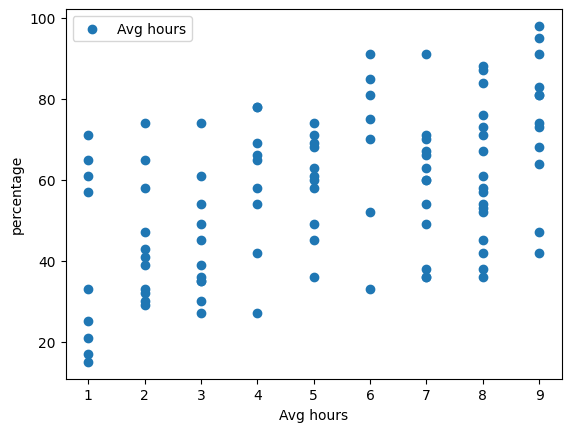

In [ ]:
plt.scatter(df['Avg_hours_studied'].head(100), df['percentage_result'].head(100), label='Avg hours')
plt.xlabel('Avg hours')
plt.ylabel('percentage')
plt.legend()

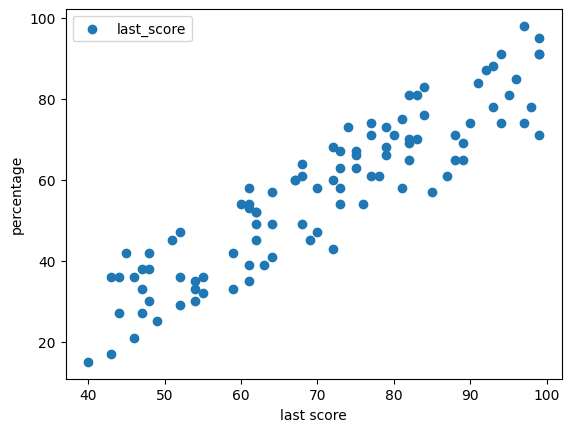

In [ ]:
plt.scatter(df['last_exam_Score'].head(100), df['percentage_result'].head(100), label='last_score')
plt.xlabel('last score')
plt.ylabel('percentage')
plt.legend()

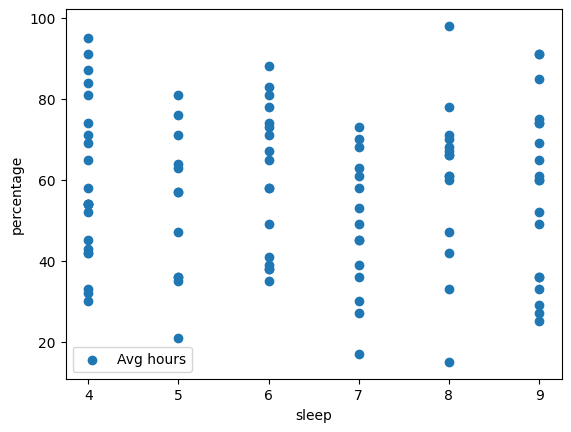

In [ ]:
plt.scatter(df['hours_slept_before_exam'].head(100), df['percentage_result'].head(100), label='Avg hours')
plt.xlabel('sleep')
plt.ylabel('percentage')
plt.legend()

In [ ]:
def loss_fxn(w, w1, w2, b, data):
  total_error = 0
  for i in range(0, len(data)):
    x = data.iloc[i].Avg_hours_studied
    x1 = data.iloc[i].last_exam_Score
    x2 = data.iloc[i].hours_slept_before_exam
    y = data.iloc[i].percentage_result
    total_error += (y - (w * x + w1*x1 + w2*x2 + b))**2
  total_error = total_error/float(len(data))
  print(total_error)


In [ ]:
#x here is the data points, y is the actual output
#predicted output is w * x
w_1 = w_2 = w_3 = 0
b_1 = 0
Learning_rate = 0.0001
for i in range(0, 1000):
   if i % 10 == 0:
      loss_fxn(w_1, w_2, w_3, b_1, df)
      print(i)
   for j in range(0, len(df)):
      x = df.iloc[i].Avg_hours_studied
      x1 = df.iloc[i].last_exam_Score
      x2 = df.iloc[i].hours_slept_before_exam
      y = df.iloc[i].percentage_result
      w_1_ = w_1 - Learning_rate*1/len(df)*(-x*(y - (w_1*x+ w_2*x1 + w_3*x2 +b_1)))
      w_2_ = w_2 - Learning_rate*1/len(df)*(-x1*(y - (w_1*x+ w_2*x1 + w_3*x2 +b_1)))
      w_3_ = w_3 - Learning_rate*1/len(df)*(-x2*(y - (w_1*x+ w_2*x1 + w_3*x2 +b_1)))
      b = b_1 + Learning_rate*1/len(df)*((y - (w_1*x+ w_2*x1 + w_3*x2 +b_1)))
      w_1 = w_1_
      w_2 = w_2_
      w_3 = w_3_
      b_1 = b

print(w_1)
print(w_2)
print(w_3)
print(b)


3418.864
0
73.06345447723025
10
73.08832565525154
20
73.76677010240006
30
74.4317228583475
40
79.17328537814929
50
73.45795091482147
60
70.29924631278276
70
81.11842826219198
80
76.09438337444348
90
96.64763561903743
100
89.95540874318309
110
73.98163271087466
120
103.7521641837512
130
72.57978079722145
140
80.64248705379461
150
165.0040821261564
160
68.10081874917243
170
72.20708492124258
180
84.91059179408366
190
93.45927523559625
200
102.9550570109465
210
93.60216288060676
220
65.12661388785925
230
96.22451984141875
240
65.2054219479806
250
71.03614335918961
260
73.52228454772373
270
72.75934371169734
280
69.62065578900845
290
85.13870769684598
300
70.58457151267346
310
62.76832647133854
320
87.9529712668483
330
64.18239297095477
340
64.6262677044533
350
68.62024830839802
360
61.57176060200926
370
81.2700302789979
380
64.18805955441367
390
62.2957929696861
400
68.63894177447834
410
60.636219688157446
420
90.47310570345529
430
60.04048621977307
440
82.48851826769484
450
59.5548917809

In [ ]:
loss_fxn(w_1, w_2, w_3, b, df)
#previous value 74 at 100 itterations

53.98249135522378


In [ ]:
df['pred'] = w_1*df['Avg_hours_studied'] + w_2*df['last_exam_Score'] + w_3*df['hours_slept_before_exam'] + b

In [ ]:
def loss():
  total_error = 0
  for i in range(0, len(df)):
    x = df.iloc[i].pred
    y = df.iloc[i].Avg_hours_studied
    total_error += (x-y)
  total_error = total_error/float(len(df))
  print(total_error)


Text(0, 0.5, 'predicted percentage')

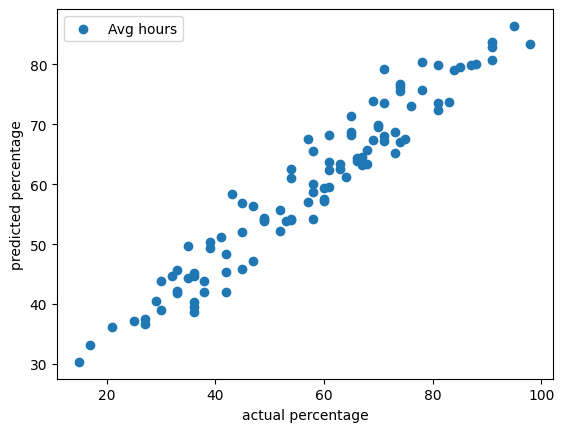

In [ ]:
plt.scatter(df['percentage_result'].head(100), df['pred'].head(100), label='Avg hours')
plt.legend()
plt.xlabel('actual percentage')
plt.ylabel('predicted percentage')

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df['pred'], df['percentage_result'])
print(mse)

53.98249135522392


In [ ]:
loss()

53.167487905597106


In [ ]:
df[['percentage_result','pred']]

,percentage_result,pred
0,91,82.941542
1,65,68.209936
2,45,45.881253
3,36,44.636149
4,66,63.958511
...,...,...
9995,23,38.932143
9996,58,55.105020
9997,74,69.491640
9998,95,83.810716


In [ ]:
residuals = df['percentage_result'] - df['pred']

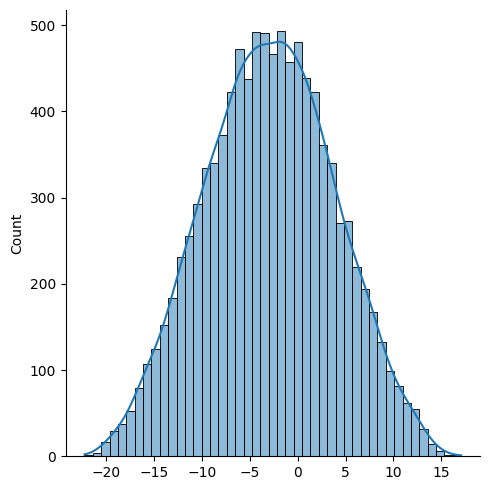

In [ ]:
sns.displot(residuals, kde = True)

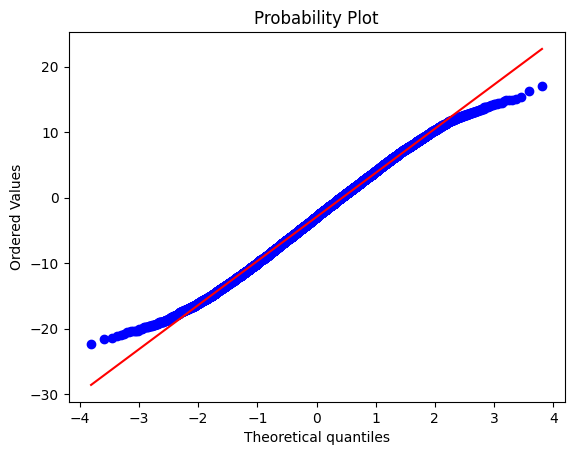

In [ ]:
import  pylab
import scipy.stats as stats

stats.probplot(residuals, dist = "norm", plot = pylab)
pylab.show()

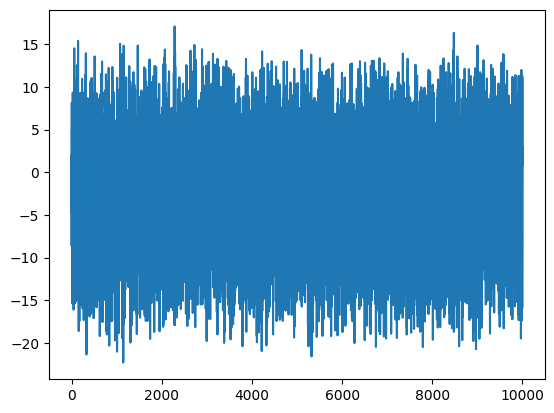

In [ ]:
plt.plot(residuals)
plt.show()